<a href="https://colab.research.google.com/github/ArshHp/DeepLearning_Fundamentals/blob/main/Prophet_App_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install fbprophet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
# load the car sales dataset
from pandas import read_csv
# load data
#Read the dataset from GDrive
Inputfile = 'drive/My Drive/ML_files/Training_dataset.csv'
df = pd.read_csv(Inputfile)
df.head()
# summarize shape
print(df.shape)
# show first few rows
df = df[['Timestamp', 'txn_response_time_ms']]
df['Timestamp']=pd.to_datetime(df['Timestamp'])
print(df.head())

(9214, 2)
            Timestamp  txn_response_time_ms
0 2021-04-30 00:11:45                  4133
1 2021-04-30 00:26:46                  4190
2 2021-04-30 00:41:37                  4125
3 2021-04-30 00:56:38                  4144
4 2021-04-30 01:11:38                  4072


In [4]:
df_features = df.copy()

In [5]:
df_features['month'] = df['Timestamp'].dt.month
df_features['day'] = df['Timestamp'].dt.day
df_features['year']=df['Timestamp'].dt.year
df_features['quarter']=df['Timestamp'].dt.quarter
df_features['dayofweek']=df['Timestamp'].dt.dayofweek
#df['is_weekend'] = df['Timestamp'].dt.is_weekend()
df_features.head()

,Timestamp,txn_response_time_ms,month,day,year,quarter,dayofweek
0,2021-04-30 00:11:45,4133,4,30,2021,2,4
1,2021-04-30 00:26:46,4190,4,30,2021,2,4
2,2021-04-30 00:41:37,4125,4,30,2021,2,4
3,2021-04-30 00:56:38,4144,4,30,2021,2,4
4,2021-04-30 01:11:38,4072,4,30,2021,2,4


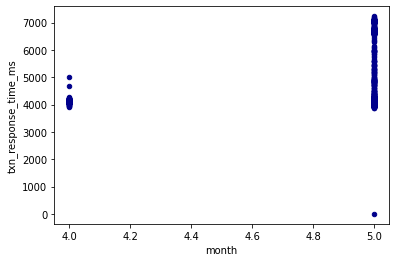

In [6]:
# load and plot the BPM Response time 
df_features.plot.scatter(x='month',
                      y='txn_response_time_ms',
                      c='DarkBlue',
                      )

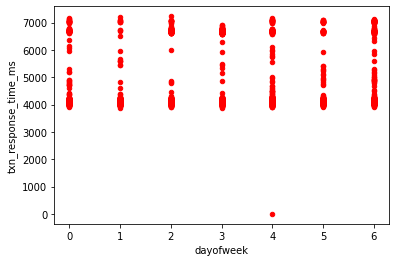

In [7]:
# load and plot the BPM Response time 
df_features.plot.scatter(x='dayofweek',
                      y='txn_response_time_ms',
                      c='red',
                      )

In [8]:
#Descending Order
#print (df.head())
df_test, df_train = [x for _, x in df.groupby(df['Timestamp'] < '2021-05-10 00:00:00')]

In [9]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet

df.columns = ['ds','y']
df['ds']= to_datetime(df['ds'])
print (df.head())
#df = df.sort_values(by="ds", ascending=False)



                   ds     y
0 2021-04-30 00:11:45  4133
1 2021-04-30 00:26:46  4190
2 2021-04-30 00:41:37  4125
3 2021-04-30 00:56:38  4144
4 2021-04-30 01:11:38  4072


In [10]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                   ds         yhat   yhat_lower   yhat_upper
0 2021-05-10 00:01:49  4669.201494  3893.773667  5450.129995
1 2021-05-10 00:03:50  4668.413545  3879.267965  5447.278970
2 2021-05-10 00:05:51  4667.608773  3887.734109  5513.198705
3 2021-05-10 00:07:50  4666.801894  3843.716838  5513.357805
4 2021-05-10 00:09:50  4665.973769  3904.483080  5420.704134


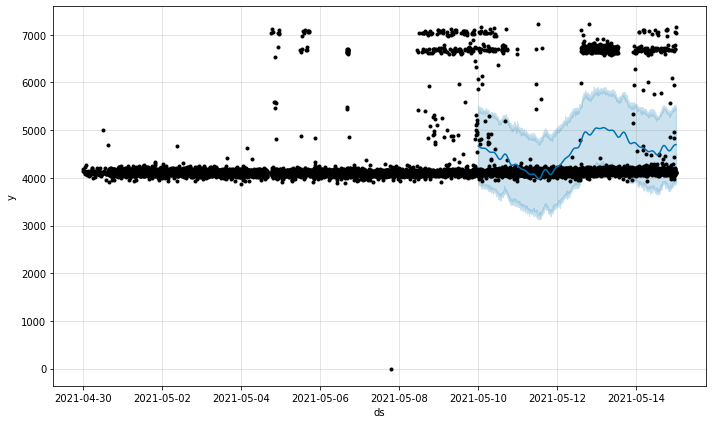

In [11]:
df_test['Timestamp']=pd.to_datetime(df_test['Timestamp'])
# define the period for which we want a prediction
from pandas import DataFrame
future = list()
future = df_test['Timestamp']
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [12]:
from sklearn.metrics import mean_absolute_error
y_test=df_test['txn_response_time_ms']
forecast = model.predict(future)
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_test, y_pred) #df_test['txn_response_time_ms'] : Actual test y Data
print('MAE: %.3f' % mae)

MAE: 624.851


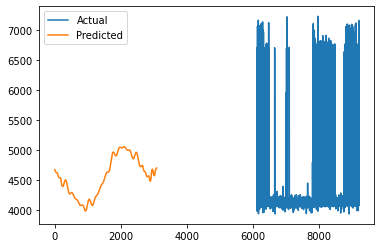

In [13]:
# plot expected vs actual

#print (y_test)
#print (y_pred)
pyplot.plot(y_test, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [14]:
#Read the test data
#Read the dataset from GDrive
import time
Inputfile = 'drive/My Drive/ML_files/Test_dataset.csv'
df_test_unseen = pd.read_csv(Inputfile)
df_test_unseen.head()
df_test_unseen['Timestamp']=pd.to_datetime(df_test_unseen['Timestamp'])
print(df_test_unseen.head())

            Timestamp  txn_response_time_ms
0 2021-05-15 00:01:44                  4072
1 2021-05-15 00:03:47                  6662
2 2021-05-15 00:07:47                  6664
3 2021-05-15 00:09:45                  4096
4 2021-05-15 00:11:45                  4109


                   ds         yhat   yhat_lower   yhat_upper
0 2021-05-15 00:01:44  4697.465556  3857.635354  5444.570627
1 2021-05-15 00:03:47  4697.458479  3915.877116  5492.627859
2 2021-05-15 00:07:47  4697.398974  3874.382506  5481.572113
3 2021-05-15 00:09:45  4697.349529  3870.422750  5467.376011
4 2021-05-15 00:11:45  4697.286936  3936.882833  5482.764942


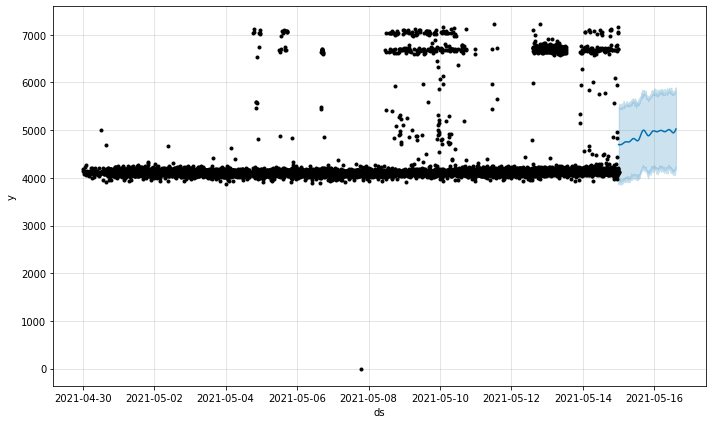

In [15]:
# define the period for which we want a prediction
from pandas import DataFrame
#future = list()
future = df_test_unseen['Timestamp']
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [16]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
y_pred = forecast['yhat'].values
mae = mean_absolute_error(df_test_unseen['txn_response_time_ms'], y_pred) #df_test_unseen['txn_response_time_ms'] : Actual test y Data
print('MAE: %.3f' % mae)

MAE: 978.971


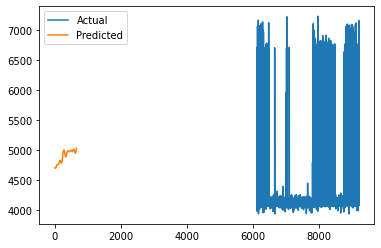

In [17]:
# plot expected vs actual
pyplot.plot(df_test['txn_response_time_ms'], label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [20]:
#Generate New Time series data
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='16/05/2021', end='30/05/2021', freq='H')
#print (date_rng)

                   ds         yhat   yhat_lower   yhat_upper
0 2021-05-16 00:00:00  4983.888895  4245.295537  5824.421642
1 2021-05-16 01:00:00  4971.582364  4213.554103  5736.302225
2 2021-05-16 02:00:00  4967.665076  4244.631293  5797.797226
3 2021-05-16 03:00:00  4979.666564  4131.793206  5758.169763
4 2021-05-16 04:00:00  4993.421880  4133.921299  5846.348874


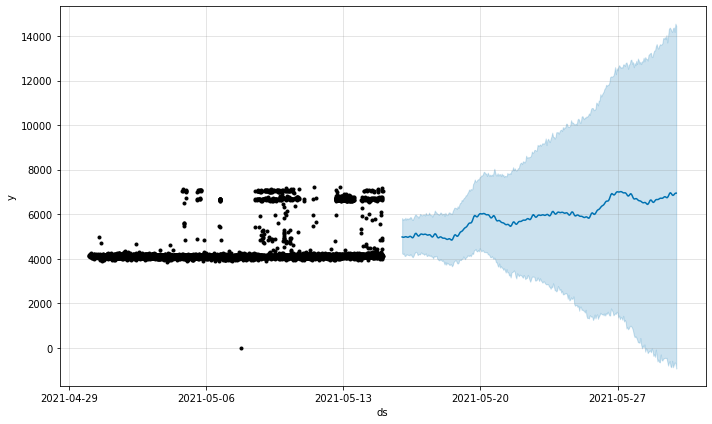

In [21]:
# define the period for which we want a prediction
from pandas import DataFrame
#future = list()
#future = df_test_unseen['Timestamp']
future = DataFrame(date_rng)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()